In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [5]:
pumpkins = pd.read_csv('pumpkin.csv')
pumpkins

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.00,280.00,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.00,160.00,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.00,100.00,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.


By the bushel

In [6]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [7]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [8]:
columns =  ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins[columns]
pumpkins

,Package,Variety,City Name,Low Price,High Price,Date
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,10/8/16
...,...,...,...,...,...,...
1738,1/2 bushel cartons,MINIATURE,ST. LOUIS,15.00,15.0,9/30/16
1739,1/2 bushel cartons,MINIATURE,ST. LOUIS,13.75,15.0,9/30/16
1740,1/2 bushel cartons,MINIATURE,ST. LOUIS,10.75,15.0,9/30/16
1741,1/2 bushel cartons,MINIATURE,ST. LOUIS,12.00,12.0,9/30/16


Find Average Price for a given month

In [9]:
pumpkins['Price'] = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'Price'] /= (1 + 1/9)
pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'Price'] /= (1/2)
pumpkins['Date'] = pd.to_datetime(pumpkins['Date'])
pumpkins['Month'] = pumpkins['Date'].dt.month
pumpkins['DayOfYear'] = pumpkins['Date'].dt.dayofyear
pumpkins

C:\Users\elwal\AppData\Local\Temp\ipykernel_28932\359634630.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pumpkins['Date'] = pd.to_datetime(pumpkins['Date'])


,Package,Variety,City Name,Low Price,High Price,Date,Price,Month,DayOfYear
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,2016-09-24,13.50,9,268
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,2016-09-24,16.20,9,268
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.00,18.0,2016-10-01,16.20,10,275
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.00,17.0,2016-10-01,15.30,10,275
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.00,15.0,2016-10-08,13.50,10,282
...,...,...,...,...,...,...,...,...,...
1738,1/2 bushel cartons,MINIATURE,ST. LOUIS,15.00,15.0,2016-09-30,30.00,9,274
1739,1/2 bushel cartons,MINIATURE,ST. LOUIS,13.75,15.0,2016-09-30,28.75,9,274
1740,1/2 bushel cartons,MINIATURE,ST. LOUIS,10.75,15.0,2016-09-30,25.75,9,274
1741,1/2 bushel cartons,MINIATURE,ST. LOUIS,12.00,12.0,2016-09-30,24.00,9,274


In [10]:
def average_given_month(df, month):
    avg = df[df['Month'] == month][['Price']].mean()
    return pd.DataFrame({"Average":avg})

In [11]:
avg = average_given_month(pumpkins,9)
avg

,Average
Price,28.544384


Visualizing

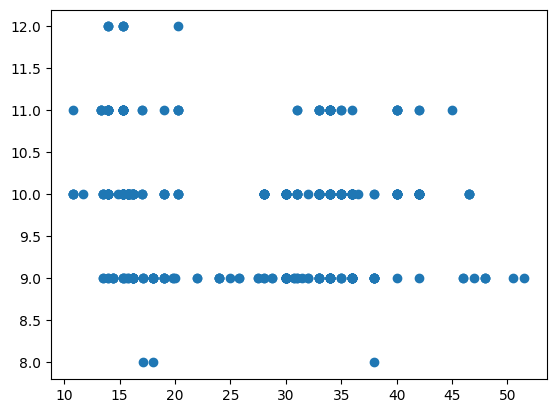

In [12]:
price = pumpkins.Price
month = pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

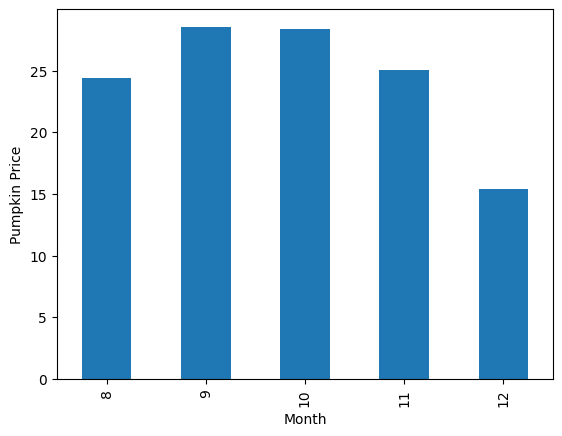

In [13]:
pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

<function matplotlib.pyplot.show(close=None, block=None)>

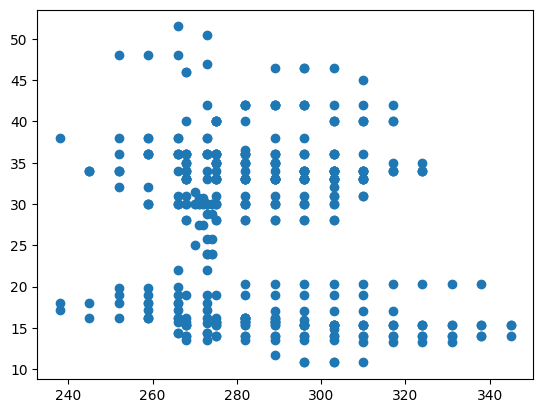

In [14]:
plt.scatter('DayOfYear','Price',data=pumpkins)
plt.show

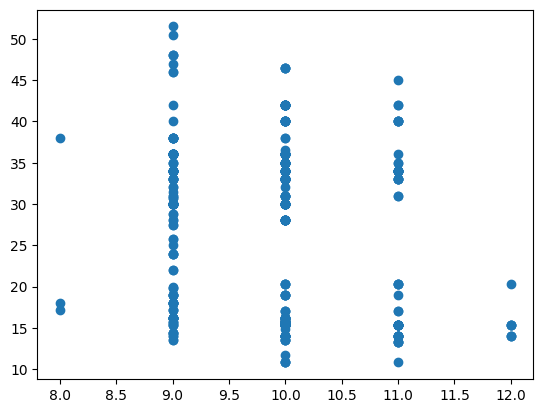

In [15]:
plt.scatter('Month','Price',data=pumpkins)
plt.show()

In [16]:
print(pumpkins['Month'].corr(pumpkins['Price']))
print(pumpkins['DayOfYear'].corr(pumpkins['Price']))


-0.14912913634278593
-0.1669009250593447


Are prices according to variety?

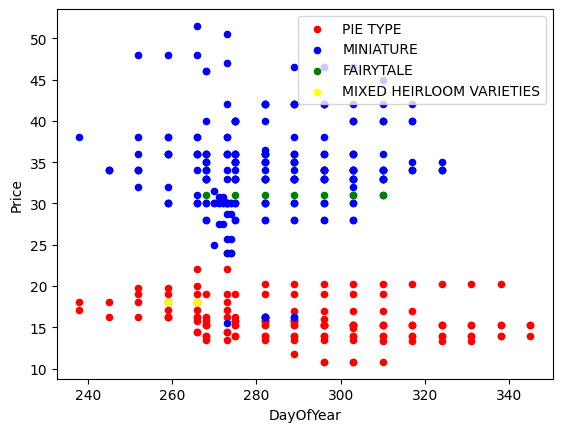

In [17]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(pumpkins['Variety'].unique()): #for all varieties plot price for days of the year
    df = pumpkins[pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<Axes: xlabel='Variety'>

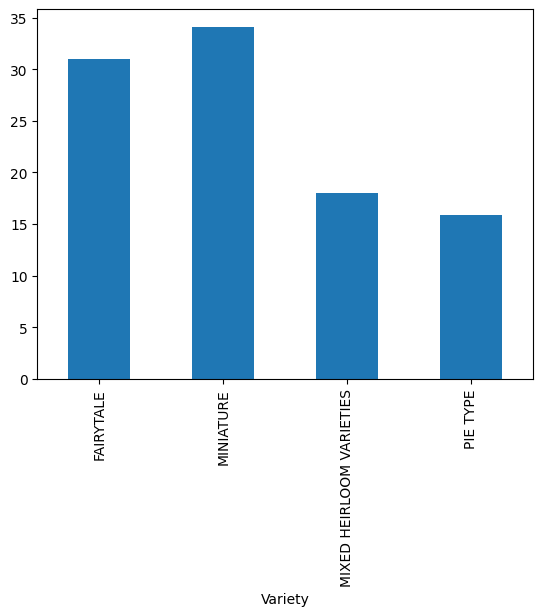

In [18]:
pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')


In [19]:
pie_pumpkins = pumpkins[pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))

-0.266785596914419


We see a correlation above so we can try linear regression to predict pumpkin prices

In [20]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins

C:\Users\elwal\AppData\Local\Temp\ipykernel_28932\3672826049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


,Package,Variety,City Name,Low Price,High Price,Date,Price,Month,DayOfYear
70,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,2016-09-24,13.5,9,268
71,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,2016-09-24,16.2,9,268
72,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,18.0,18.0,2016-10-01,16.2,10,275
73,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,17.0,17.0,2016-10-01,15.3,10,275
74,1 1/9 bushel cartons,PIE TYPE,BALTIMORE,15.0,15.0,2016-10-08,13.5,10,282
...,...,...,...,...,...,...,...,...,...
1626,1 1/9 bushel cartons,PIE TYPE,PHILADELPHIA,12.0,12.0,2016-10-22,10.8,10,296
1627,1 1/9 bushel cartons,PIE TYPE,PHILADELPHIA,12.0,12.0,2016-10-29,10.8,10,303
1628,1 1/9 bushel cartons,PIE TYPE,PHILADELPHIA,18.0,20.0,2017-08-26,17.1,8,238
1629,1 1/9 bushel cartons,PIE TYPE,PHILADELPHIA,18.0,18.0,2017-09-16,16.2,9,259


In [21]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1) #we will train based on day of year
y = pie_pumpkins['Price'] #the ground truth is the original prices which we aim to predict

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [24]:
pred = model.predict(X_test)
model.score(X_test,y_test)

0.13480461817393996

In [25]:
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.03 (12.9%)


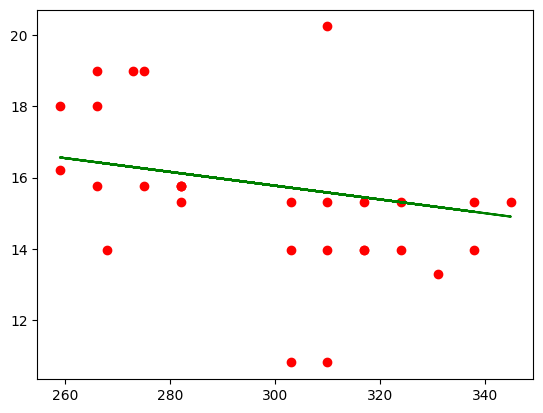

In [26]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test,pred, color = 'green')
plt.show()

We note its not that accurate so we may want to try polynomial regression.

In [27]:
model_2 = make_pipeline(PolynomialFeatures(2), LinearRegression()) #square the inputs added to together for example, (x+y+z)^2, then preform linear regression on that
model_2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [28]:
pred_2 = model_2.predict(X_test)

model_2.score(X_test,y_test)

0.11924839623561956

In [29]:
mse_2 = np.sqrt(mean_squared_error(y_test,pred_2))
print(f'Mean error: {mse_2:3.3} ({mse_2/np.mean(pred_2)*100:3.3}%)')


Mean error: 2.05 (12.9%)


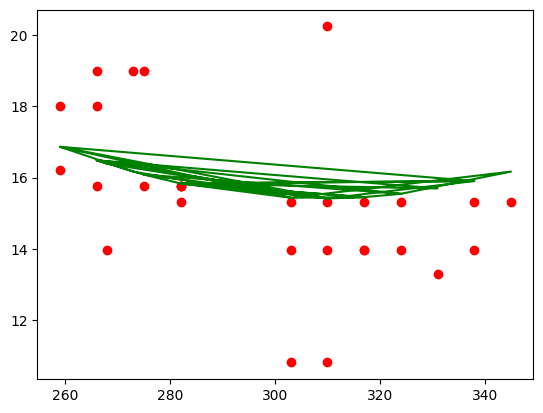

In [30]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test,pred_2, color = 'green')
plt.show()

Is variety sufficient enough to predict price?

<Axes: xlabel='Variety'>

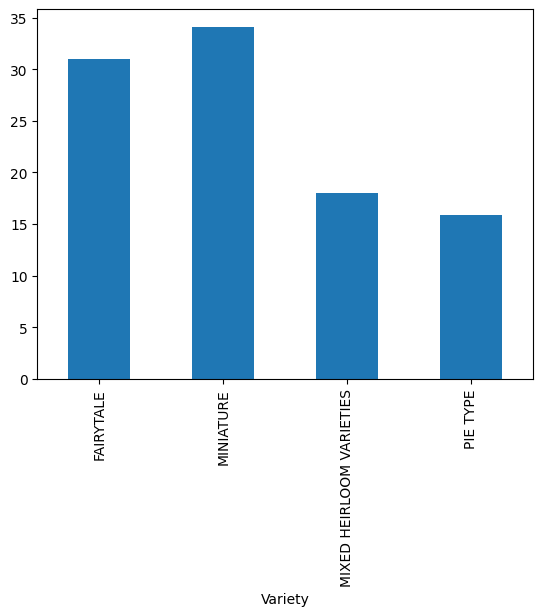

In [31]:
pumpkins.groupby('Variety')['Price'].mean().plot(kind = 'bar')

In [32]:
var_one_hot = pd.get_dummies(pumpkins['Variety'])
print(var_one_hot.corrwith(pumpkins['Price']))

FAIRYTALE                   0.044396
MINIATURE                   0.857832
MIXED HEIRLOOM VARIETIES   -0.068122
PIE TYPE                   -0.871526
dtype: float64


Linear Regression

In [33]:
X,y = var_one_hot, pumpkins['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [34]:
model_3 = LinearRegression()
model_3.fit(X_train,y_train)

LinearRegression()

In [35]:
model_3.score(X_test,y_test)

0.6801560836930273

Lets do a bunch of features together

In [36]:
X =pd.get_dummies(pumpkins['Variety']).join(pumpkins['Month']).join(pd.get_dummies(pumpkins['City Name'])).join(pd.get_dummies(pumpkins['Package']))
y = pumpkins['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2 ,random_state= 0)

In [37]:
model_4 = make_pipeline(PolynomialFeatures(2),LinearRegression())
model_4.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [38]:
pred_4 = model_4.predict(X_test)
print(model_4.score(X_train, y_train))
print(model_4.score(X_test, y_test))

0.9653169058149602
0.955582031539035


In [39]:
mse = np.sqrt(mean_squared_error(y_test,pred_4))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred_4)*100:3.3}%)')

Mean error: 2.29 (8.49%)


Encoding

In [40]:
full_pumpkins = pd.read_csv('pumpkin.csv')
col = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins[col]
pumpkins.dropna(inplace = True)
pumpkins

C:\Users\elwal\AppData\Local\Temp\ipykernel_28932\3233869259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkins.dropna(inplace = True)


,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE
...,...,...,...,...,...,...
1694,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1695,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1696,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1697,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE


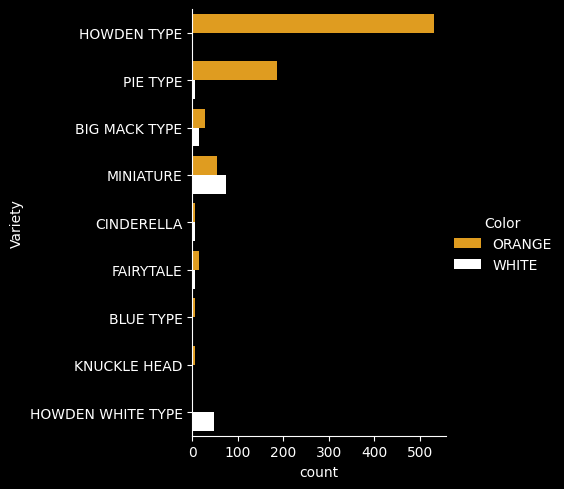

In [41]:
plt.style.use("dark_background")
pallete = {"ORANGE":"orange", "WHITE": "white"}
sns.catplot(
data=pumpkins, y="Variety", hue="Color", kind="count",palette= pallete
)

In [43]:
item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']] #logically ordered
categorical_features = ['City Name', 'Package', 'Variety', 'Origin'] #not ordered
categorical_encoder = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)
ct = ColumnTransformer(transformers=[
        ('ord', ordinal_encoder, ['Item Size']),
        ('cat', categorical_encoder, categorical_features)
]) #combining into one transformation
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)


In [44]:
encoded_features

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1695,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color']) #labels from 0 -> n-1
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

In [48]:
encoded_pumpkins

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1695,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1696,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1697,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


C:\Users\elwal\AppData\Local\Temp\ipykernel_28932\2600694035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']
C:\Users\elwal\AppData\Local\Temp\ipykernel_28932\2600694035.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.catplot(


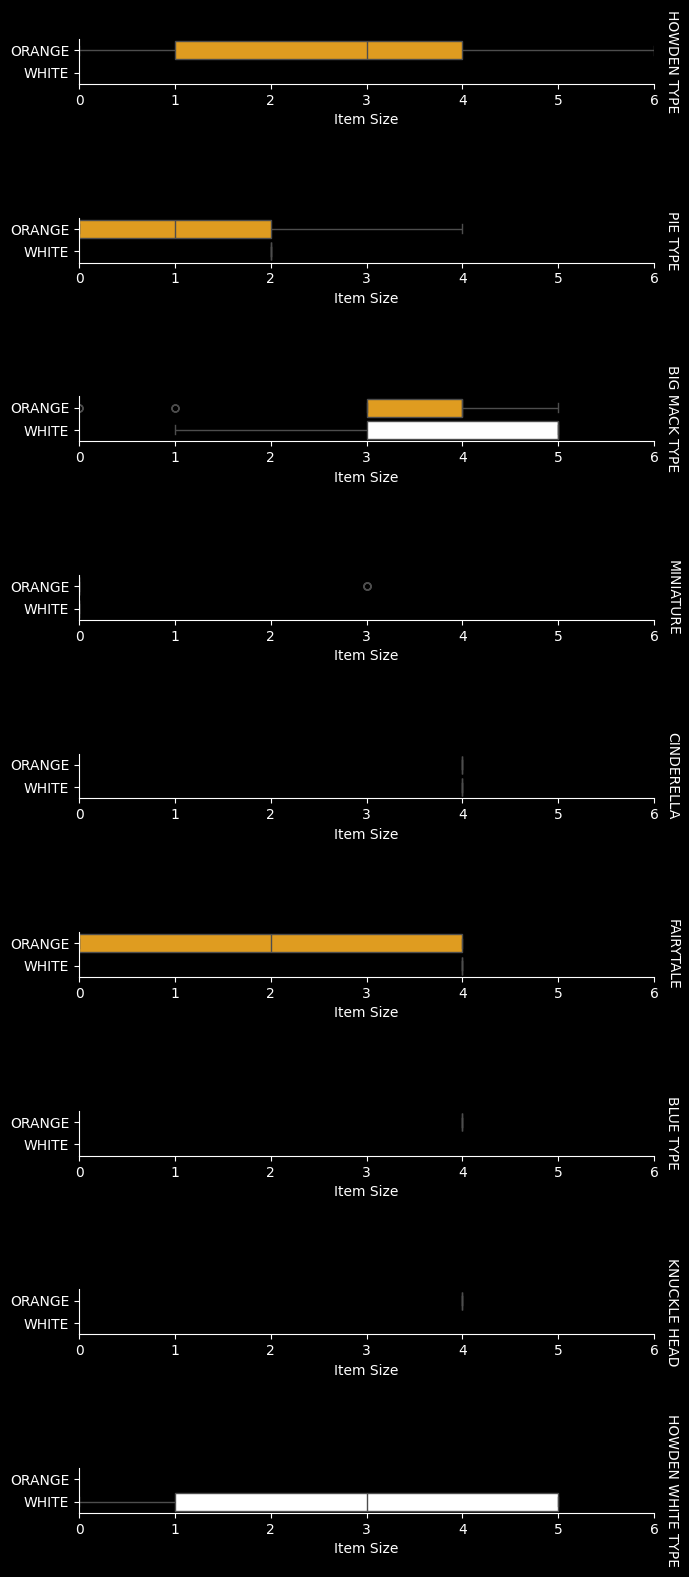

In [49]:
palette = {
    'ORANGE': 'orange',
    'WHITE': 'white',
    }
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

box_plot = sns.catplot(
        data=pumpkins,
        x="Item Size", y="Color", row='Variety',
        kind="box", orient="h",
        sharex=False, margin_titles=True,
        height=1.8, aspect=4, palette=palette,
    )
box_plot.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
box_plot.set_titles(row_template="{row_name}")

C:\Users\elwal\AppData\Local\Temp\ipykernel_28932\4124120556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)
c:\Users\elwal\anaconda3\envs\tweleve\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\elwal\anaconda3\envs\tweleve\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

c:\Users\elwal\anaconda3\envs\tweleve\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\elwal\anaconda3\envs\tweleve\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


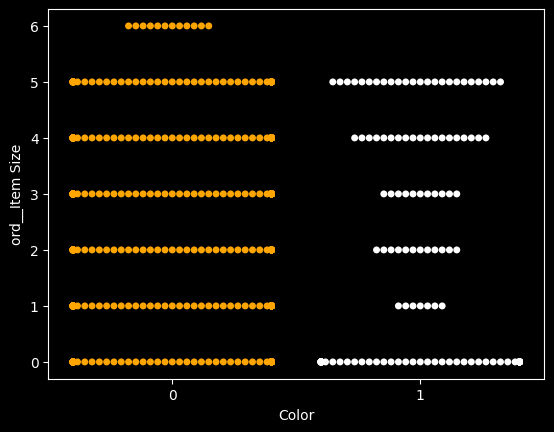

In [52]:
palette = {
'0': 'orange',
'1': 'white'
}
sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)

Logistic Regression

In [61]:
X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])] #take every column except color
y = encoded_pumpkins['Color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)


LogisticRegression()

In [63]:
pred_log = model_log.predict(X_test)
print(classification_report(y_test, pred_log))
print('Predicted labels: ', pred_log)
print('F1-score: ', f1_score(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       165
           1       1.00      0.74      0.85        34

    accuracy                           0.95       199
   macro avg       0.97      0.87      0.91       199
weighted avg       0.96      0.95      0.95       199

Predicted labels:  [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 0 1 0]
F1-score:  0.847457627118644


<Axes: >

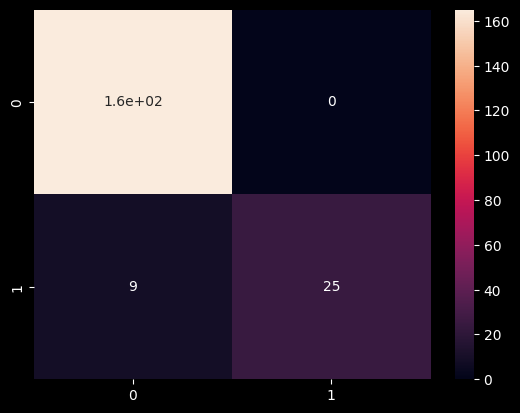

In [66]:
cm = confusion_matrix(y_test, pred_log) 
sns.heatmap(cm, annot=True)

C:\Users\elwal\AppData\Local\Temp\ipykernel_28932\3785839164.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color = 'white')


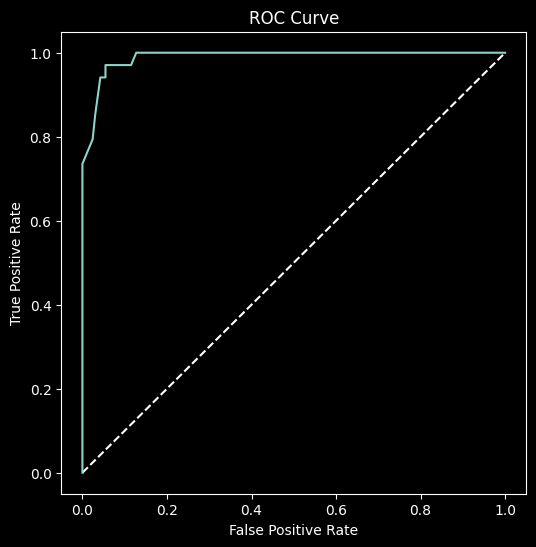

In [72]:
y_scores = model_log.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--', color = 'white')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [73]:
roc_auc_score(y_test,y_scores[:,1])

0.9893048128342247